In [3]:
import json
def load_jsonl(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        return [json.loads(l) for l in lines]
sample_data = "stack/stack_data_sample.jsonl"
data = load_jsonl(sample_data)

In [25]:
file_path = 'stack/filtered_v1.img/0.txt'  
  
# 用于存储数据的列表  
image_data = []  
  
# 打开并读取文件  
with open(file_path, 'r', encoding='utf-8') as file:  
    for line in file:  
        # 使用 \t 分割每一行，并去除行末的换行符  
        columns = line.strip().split('\t')  
        # 将分割后的行添加到数据列表中  
        image_data.append(columns)  
  
# # 输出整个数据列表  
# print(data)  

In [ ]:
image_data[-3:]

In [ ]:
len(data)

In [1]:
# data_process/stack_over_flow/stack/filtered_v1.jsonl

import json
def load_jsonl(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        return [json.loads(l) for l in lines]
sample_data = "stack/filtered_v1.jsonl"
data = load_jsonl(sample_data)

In [ ]:
len(data)

In [3]:
import re  
  
def extract_image_links(data):  
    image_links = []  
    for item in data:  
        meta_question = item.get("meta", {}).get("meta_question", "")  
        # 使用正则表达式提取所有<img src="...">的链接  
        links = re.findall(r'<img\s+src="([^"]+)"', meta_question)  
        image_links.extend(links)  
    return image_links  
  
# 调用函数并打印结果  
links = extract_image_links(data)  
# for link in links:  
#     print(link)  

In [4]:
import re  
  
def add_image_links_to_data(data):  
    for item in data:  
        meta_question = item.get("meta", {}).get("meta_question", "")  
        # 使用正则表达式提取所有<img src="...">的链接  
        links = re.findall(r'<img\s+src="([^"]+)"', meta_question)  
        # 添加一个新的键 'images' 到每个item  
        item['images_url'] = links  
  
# # 假设这是您的数据结构  
# data = [  
#     {"meta": {"meta_question": "<p>...<img src=\"https://i.stack.imgur.com/cDzxr.png\" alt=\"...\" /></p>"}},  
#     {"meta": {"meta_question": "<p>...<img src=\"https://example.com/image1.png\" alt=\"...\" /></p>"}},  
#     # 更多项目...  
# ]  
  
# 调用函数  
add_image_links_to_data(data)  
  
# # 打印结果查看每个item是否添加了'images'键  
# for item in data:  
#     print(item)  

In [6]:
# data[:10]

In [ ]:
import csv  
from tqdm import tqdm
# 读取映射文件并创建字典  
mapping_dict = {}  
with open('mapping_valid.csv', mode='r', newline='') as file:  
    reader = csv.DictReader(file)  
    for row in reader:  
        mapping_dict[row['image_url']] = row['image_filename']  
  
# # 假设 data 是给定的数据列表  
# data = [  
#     {"images_url": ["https://i.stack.imgur.com/cL8iu.png"]},  
#     # 添加其他数据项  
# ]  
  
# 初始化结果列表  
processed_data = []  
unmapped_data = []  
  
# 处理数据  
for item in tqdm(data, desc="Processing Data"):  
    images = []  
    all_mapped = True  
    for url in item['images_url']:  
        if url in mapping_dict:  
            images.append(f"save_images/{mapping_dict[url]}")  
        else:  
            all_mapped = False  
            break  
      
    if all_mapped:  
        new_item = item.copy()  
        new_item['images'] = images  
        processed_data.append(new_item)  
    else:  
        unmapped_data.append(item)  
  
# # 结果  
# print("Processed Data:", processed_data)  
# print("Unmapped Data:", unmapped_data)  

In [ ]:
import csv  
from tqdm import tqdm
import json
# 读取映射文件并创建字典  
# mapping_dict = {}  
# with open('mapping_valid.csv', mode='r', newline='') as file:  
#     reader = csv.DictReader(file)  
#     for row in reader:  
#         mapping_dict[row['image_url']] = row['image_filename']  

with open("/mnt/lingjiejiang/multimodal_code/data/stack_supply/url_to_filename/all_combined_data.json", "r") as f:
    mapping_dict = json.load(f)
# # 假设 data 是给定的数据列表  
# data = [  
#     {"images_url": ["https://i.stack.imgur.com/cL8iu.png"]},  
#     # 添加其他数据项  
# ]  
  
# 初始化结果列表  
processed_data = []  
unmapped_data = []  
  
# 处理数据  
for item in tqdm(data, desc="Processing Data"):  
    images = []  
    all_mapped = True  
    for url in item['images_url']:  
        if url in mapping_dict:  
            images.append(mapping_dict[url])  
        else:  
            all_mapped = False  
            break  
      
    if all_mapped:  
        new_item = item.copy()  
        new_item['images'] = images  
        processed_data.append(new_item)  
    else:  
        unmapped_data.append(item)  
  
# # 结果  
# print("Processed Data:", processed_data)  
# print("Unmapped Data:", unmapped_data)  

In [ ]:
processed_data[:2]

In [13]:
urls = [item["meta"]["url"] for item in processed_data]

In [6]:
from urllib.parse import urlparse  
  
def extract_domain(url):  
    parsed_url = urlparse(url)  
    return parsed_url.netloc  
  
# 示例 URL 列表  
# urls = [  
#     "https://stackoverflow.com-Posts/questions/42861528",  
#     "https://apple.stackexchange.com-Posts/questions",  
#     "https://sharepoint.stackexchange.com/questions/174985"  
# ]  
  
# # 提取域名部分  
# domains = [extract_domain(url) for url in urls]  
# print(domains)  

In [ ]:
set(domains)

In [7]:
from urllib.parse import urlparse  
  
def extract_domain(url):  
    parsed_url = urlparse(url)  
    return parsed_url.netloc  

def add_domain_to_data(data):  
    for item in data:  
        # meta_question = item.get("meta", {}).get("meta_question", "")  
        # # 使用正则表达式提取所有<img src="...">的链接  
        # links = re.findall(r'<img\s+src="([^"]+)"', meta_question)  
        # 添加一个新的键 'images' 到每个item  
        item['domain'] = extract_domain(item.get("meta", {}).get("url", ""))  
    
# 调用函数  
add_domain_to_data(processed_data)  

In [8]:
processed_data[:2]

[{'question': "Why didn't my Windows partition show up in the Startup Disk preference pane? I install Windows(XP after that 7) on my MBP with Boot Camp and every thing was fine but after a while in System Prefences -> Startup Disk my windows partition was lost and when I want to switch to my windows must restart my Laptop and Press Down option during startup. I can't switch directly from my OS X.\nanyone know how can I solve this. or why this is happened?\n\n",
  'answers': ["Did you by any chance install the NTFS-3G driver?\nIt's a known bug (for quite some time, now). When installed, you can no longer have the Windows partition in the Startup Disk prefpane.\n"],
  'meta': {'language': 'en',
   'url': 'https://apple.stackexchange.com/questions/117',
   'timestamp': '2023-03-29',
   'source': 'stackexchange',
   'question_score': '7',
   'meta_question': 'Why didn\'t my Windows partition show up in the Startup Disk preference pane? <p>I install Windows(XP after that 7) on my MBP with B

In [9]:
len(processed_data)

1008197

In [16]:
from collections import Counter  
  
# 假设 processed_data 已经被正确地初始化和处理  
# processed_data = [...]  
  
# 初始化计数器  
domain_counter = Counter()  
  
# 遍历 processed_data，统计每个 domain 的出现次数  
for item in processed_data:  
    domain = item.get("domain", None)  # 获取 domain 字段的值，默认值为 None  
    if domain:  
        domain_counter[domain] += 1  
  
# 获取按数量从大到小排序的 domain 列表  
sorted_domains = domain_counter.most_common()  
  
# 输出每个类别及其数量  
for domain, count in sorted_domains:  
    print(f"Domain: {domain}, Count: {count}")  

Domain: stackoverflow.com-Posts, Count: 833131
Domain: tex.stackexchange.com, Count: 66852
Domain: mathematica.stackexchange.com, Count: 15012
Domain: superuser.com, Count: 13640
Domain: gis.stackexchange.com, Count: 11282
Domain: askubuntu.com, Count: 10884
Domain: salesforce.stackexchange.com, Count: 6316
Domain: stats.stackexchange.com, Count: 5729
Domain: electronics.stackexchange.com, Count: 5716
Domain: magento.stackexchange.com, Count: 5674
Domain: unix.stackexchange.com, Count: 4498
Domain: dba.stackexchange.com, Count: 4353
Domain: serverfault.com, Count: 3778
Domain: math.stackexchange.com, Count: 3714
Domain: apple.stackexchange.com, Count: 3492
Domain: sharepoint.stackexchange.com, Count: 3219
Domain: wordpress.stackexchange.com, Count: 3107
Domain: meta.stackexchange.com, Count: 2822
Domain: ru.stackoverflow.com, Count: 1245
Domain: gaming.stackexchange.com, Count: 835
Domain: softwareengineering.stackexchange.com, Count: 804
Domain: pt.stackoverflow.com, Count: 562
Domain

In [20]:
import csv  
from collections import Counter  
  
# 假设 processed_data 已经被正确地初始化和处理  
# processed_data = [...]  
  
# 初始化计数器  
domain_counter = Counter()  
  
# 遍历 processed_data，统计每个 domain 的出现次数  
for item in processed_data:  
    domain = item.get("domain", None)  # 获取 domain 字段的值，默认值为 None  
    if domain:  
        domain_counter[domain] += 1  
  
# 获取按数量从大到小排序的 domain 列表  
sorted_domains = domain_counter.most_common()  
  
# 输出每个类别及其数量（可选）  
for domain, count in sorted_domains:  
    print(f"Domain: {domain}, Count: {count}")  
  
# 将结果写入 CSV 文件  
output_csv_path = 'domain_count.csv'  
  
with open(output_csv_path, mode='w', newline='', encoding='utf-8') as csv_file:  
    writer = csv.writer(csv_file)  
    # 写入标题行  
    writer.writerow(['domain', 'count'])  
    # 写入每个类别及其数量  
    for domain, count in sorted_domains:  
        writer.writerow([domain, count])  
  
print(f"类别统计信息已经写入到 {output_csv_path}")  

Domain: stackoverflow.com-Posts, Count: 833131
Domain: tex.stackexchange.com, Count: 66852
Domain: mathematica.stackexchange.com, Count: 15012
Domain: superuser.com, Count: 13640
Domain: gis.stackexchange.com, Count: 11282
Domain: askubuntu.com, Count: 10884
Domain: salesforce.stackexchange.com, Count: 6316
Domain: stats.stackexchange.com, Count: 5729
Domain: electronics.stackexchange.com, Count: 5716
Domain: magento.stackexchange.com, Count: 5674
Domain: unix.stackexchange.com, Count: 4498
Domain: dba.stackexchange.com, Count: 4353
Domain: serverfault.com, Count: 3778
Domain: math.stackexchange.com, Count: 3714
Domain: apple.stackexchange.com, Count: 3492
Domain: sharepoint.stackexchange.com, Count: 3219
Domain: wordpress.stackexchange.com, Count: 3107
Domain: meta.stackexchange.com, Count: 2822
Domain: ru.stackoverflow.com, Count: 1245
Domain: gaming.stackexchange.com, Count: 835
Domain: softwareengineering.stackexchange.com, Count: 804
Domain: pt.stackoverflow.com, Count: 562
Domain

In [19]:
import os  
import json  
from collections import defaultdict  
  
# 假设 processed_data 已经被正确地初始化和处理  
# processed_data = [...]  
  
# 创建一个字典来存储每个 domain 的数据  
domain_data = defaultdict(list)  
  
# 将数据分类到不同的 domain 中  
for item in processed_data:  
    domain = item.get("domain", None)  
    if domain:  
        domain_data[domain].append(item)  
  
# 定义输出目录  
output_base_dir = 'data_process/sampled_data'  
  
# 确保输出目录存在  
os.makedirs(output_base_dir, exist_ok=True)  
  
# 遍历每个 domain  
for domain, items in domain_data.items():  
    # 取前25条和最后25条数据  
    sampled_items = items[:25] + items[-25:]  
  
    # 将样本数据保存为 JSON 文件，文件名为 domain  
    output_file = os.path.join(output_base_dir, f'{domain}.json')  
    with open(output_file, 'w') as f:  
        json.dump(sampled_items, f, indent=4)  
  
    print(f"Saved {len(sampled_items)} samples for domain '{domain}' in '{output_file}'")  

Saved 50 samples for domain 'apple.stackexchange.com' in 'data_process/sampled_data/apple.stackexchange.com.json'
Saved 50 samples for domain 'askubuntu.com' in 'data_process/sampled_data/askubuntu.com.json'
Saved 50 samples for domain 'dba.stackexchange.com' in 'data_process/sampled_data/dba.stackexchange.com.json'
Saved 50 samples for domain 'diy.stackexchange.com' in 'data_process/sampled_data/diy.stackexchange.com.json'
Saved 50 samples for domain 'electronics.stackexchange.com' in 'data_process/sampled_data/electronics.stackexchange.com.json'
Saved 50 samples for domain 'ell.stackexchange.com' in 'data_process/sampled_data/ell.stackexchange.com.json'
Saved 50 samples for domain 'english.stackexchange.com' in 'data_process/sampled_data/english.stackexchange.com.json'
Saved 50 samples for domain 'es.stackoverflow.com' in 'data_process/sampled_data/es.stackoverflow.com.json'
Saved 50 samples for domain 'gaming.stackexchange.com' in 'data_process/sampled_data/gaming.stackexchange.com.

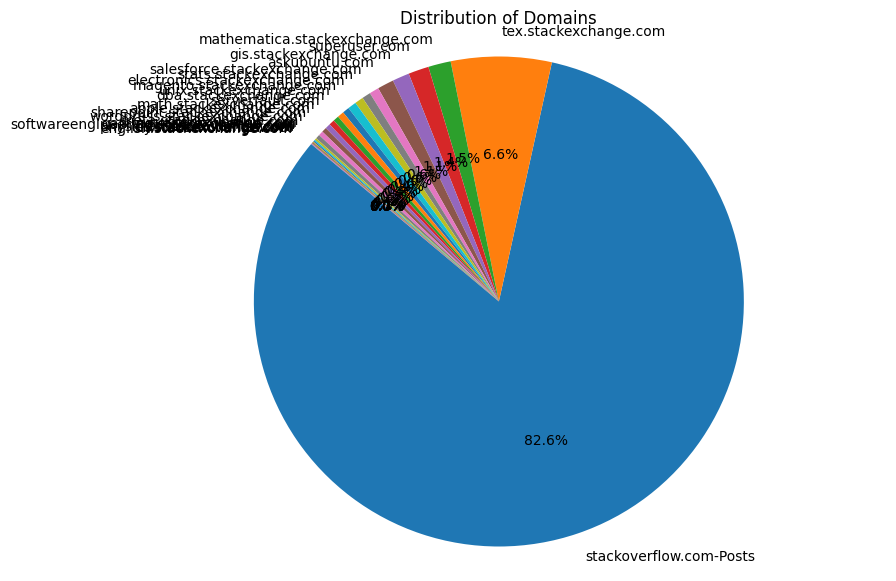

In [17]:
import matplotlib.pyplot as plt  
from collections import Counter  
  
# 假设 processed_data 已经被正确地初始化和处理  
# processed_data = [...]  
  
# 初始化计数器  
domain_counter = Counter()  
  
# 遍历 processed_data，统计每个 domain 的出现次数  
for item in processed_data:  
    domain = item.get("domain", None)  # 获取 domain 字段的值，默认值为 None  
    if domain:  
        domain_counter[domain] += 1  
  
# 获取按数量从大到小排序的 domain 列表  
sorted_domains = domain_counter.most_common()  
  
# 提取标签和计数  
labels, counts = zip(*sorted_domains)  # 解压成两个列表  
  
# 绘制饼状图  
plt.figure(figsize=(10, 7))  
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)  
plt.title('Distribution of Domains')  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.  
  
# 显示图表  
plt.show()  

In [13]:
single_image_data = [item for item in processed_data if len(item['images']) == 1]
len(single_image_data)

692133

In [1]:
import json
with open('/mnt/lingjiejiang/multimodal_code/data/stack_overflow/processed_data.jsonl', "r") as f:
    lines = f.readlines()
    processed_data = [json.loads(l) for l in lines]   


In [3]:
len(processed_data)

1008197

In [4]:
processed_data[:2]

[{'question': "Why didn't my Windows partition show up in the Startup Disk preference pane? I install Windows(XP after that 7) on my MBP with Boot Camp and every thing was fine but after a while in System Prefences -> Startup Disk my windows partition was lost and when I want to switch to my windows must restart my Laptop and Press Down option during startup. I can't switch directly from my OS X.\nanyone know how can I solve this. or why this is happened?\n\n",
  'answers': ["Did you by any chance install the NTFS-3G driver?\nIt's a known bug (for quite some time, now). When installed, you can no longer have the Windows partition in the Startup Disk prefpane.\n"],
  'meta': {'language': 'en',
   'url': 'https://apple.stackexchange.com/questions/117',
   'timestamp': '2023-03-29',
   'source': 'stackexchange',
   'question_score': '7',
   'meta_question': 'Why didn\'t my Windows partition show up in the Startup Disk preference pane? <p>I install Windows(XP after that 7) on my MBP with B

In [11]:
# 将 processed_data 写入 jsonl 文件  
output_file = '/mnt/lingjiejiang/multimodal_code/data/stack_overflow/processed_data.jsonl'  
with open(output_file, 'w') as f:  
    for entry in processed_data:  
        json_line = json.dumps(entry)  
        f.write(json_line + '\n') 

In [ ]:
len(unmapped_data)

In [ ]:
# 写入 processed_data 到 JSONL 文件  
with open('processed_data.jsonl', 'w') as file:  
    for entry in processed_data:  
        json.dump(entry, file)  
        file.write('\n')  
  
# 写入 unmapped_data 到 JSONL 文件  
with open('unmapped_data.jsonl', 'w') as file:  
    for entry in unmapped_data:  
        json.dump(entry, file)  
        file.write('\n')  
  
print("Data has been written to JSONL files.")  

In [ ]:
# 合并所有 unmapped_data 中的 images_url  
unmapped_urls = []  
for item in unmapped_data:  
    unmapped_urls.extend(item['images_url'])  
  
# # 将合并后的列表写入文件  
with open('unmapped_urls.json', 'w') as file:  
    json.dump(unmapped_urls, file)  
  
print("Unmapped URLs have been written to unmapped_urls.json.")  

In [ ]:
data[0]["meta"]["meta_question"]

In [ ]:
import os
import base64
import csv
from tqdm import tqdm

def main():
    # 用于存储解析到的两类数据
    # 1. 不为 None 的记录 (image_url, image_filename)
    mapping_data_valid = []
    # 2. 为 None 的记录 (image_url, image_filename)
    mapping_data_none = []

    # 用于给图片命名（递增计数）
    image_index = 0

    # 数据文件所在目录
    data_dir = 'stack/filtered_v1.img'
    # 要保存图片的目录
    save_dir = 'save_images'
    # 用于存储最终 (URL, 文件名) 对应关系的 CSV 文件
    mapping_csv_path_valid = 'mapping_valid.csv'
    mapping_csv_path_none = 'mapping_none.csv'

    # 如果保存图片的目录不存在，则创建
    os.makedirs(save_dir, exist_ok=True)

    # ---------------------------
    # 第一步：统计总行数（total_lines）
    # ---------------------------
    total_lines = 0
    for i in range(500):  # 假设文件名从 0.txt ~ 499.txt
        file_name = f"{i}.txt"
        file_path = os.path.join(data_dir, file_name)
        if not os.path.isfile(file_path):
            continue
        with open(file_path, 'r', encoding='utf-8') as f:
            for _ in f:
                total_lines += 1

    # 如果没有任何行，就直接退出
    if total_lines == 0:
        print("未找到任何可处理的文件或行，请检查目录和文件内容。")
        return

    # ---------------------------
    # 第二步：遍历文件并处理行，使用 tqdm 显示进度
    # ---------------------------
    with tqdm(total=total_lines, desc="Processing lines", unit="line") as pbar:
        for i in range(500):
            file_name = f"{i}.txt"
            file_path = os.path.join(data_dir, file_name)
            if not os.path.isfile(file_path):
                continue

            # 读取文件的所有行
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()

            # 处理每一行
            for line in lines:
                columns = line.strip().split('\t')
                if len(columns) != 2:
                    # 如果列数不对，可选择跳过或做异常处理
                    pbar.update(1)
                    continue

                image_url, b64_str = columns
                image_filename = f"{image_index}.png"

                if b64_str == "None":
                    # Base64 为 None，不保存图片，存入 None 映射
                    mapping_data_none.append((image_url, image_filename))
                else:
                    # Base64 有效，尝试解码并保存图片
                    try:
                        img_data = base64.b64decode(b64_str)
                        with open(os.path.join(save_dir, image_filename), 'wb') as img_file:
                            img_file.write(img_data)
                        # 保存映射
                        mapping_data_valid.append((image_url, image_filename))
                    except Exception as e:
                        print(f"解码或写文件出错: {e}")
                        # 如果需要，可以将这条数据写入 mapping_data_none，或做其它处理
                        mapping_data_none.append((image_url, image_filename))

                image_index += 1
                # 每处理一行，就更新进度条
                pbar.update(1)

    # ---------------------------
    # 第三步：保存映射文件
    # ---------------------------
    # 不为 None 的映射关系
    with open(mapping_csv_path_valid, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["image_url", "image_filename"])
        writer.writerows(mapping_data_valid)

    # 为 None 的映射关系
    with open(mapping_csv_path_none, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["image_url", "image_filename"])
        writer.writerows(mapping_data_none)

    # ---------------------------
    # 结束提示
    # ---------------------------
    print("处理完成！")
    print(f"共处理 {image_index} 条数据。")
    print(f"含有有效 base64 的数据映射保存到: {mapping_csv_path_valid}")
    print(f"base64 为 None 的数据映射保存到: {mapping_csv_path_none}")
    print(f"解码后的图片存储在目录: {save_dir}")

if __name__ == "__main__":
    main()


In [ ]:
import os
import base64
import csv
from tqdm import tqdm

def main():
    # 用于存储解析到的三类数据：
    # 1. 不为 None 的记录 (image_url, image_filename)
    mapping_data_valid = []
    # 2. 为 None 的记录 (image_url, image_filename)
    mapping_data_none = []
    # 3. 列数不对的行（原始行内容）
    mapping_data_bad_format = []

    # 用于给图片命名（自增计数）
    image_index = 0

    # 数据文件所在目录
    data_dir = 'stack/filtered_v1.img'
    # 要保存图片的目录
    save_dir = 'save_images'
    # 最终输出的 CSV 文件
    mapping_csv_path_valid = 'mapping_valid.csv'
    mapping_csv_path_none = 'mapping_none.csv'
    mapping_csv_path_bad = 'mapping_bad_format.csv'

    # 如果保存图片的目录不存在，则创建
    os.makedirs(save_dir, exist_ok=True)

    # -------------------------------------------------------------------
    # 第一步：统计总行数（total_lines） —— 为了 tqdm 能显示完整进度
    # -------------------------------------------------------------------
    total_lines = 0
    for i in range(333, 500):  # 假设文件名从 0.txt ~ 499.txt
        print(i)
        file_name = f"{i}.txt"
        file_path = os.path.join(data_dir, file_name)

        if not os.path.isfile(file_path):
            continue

        # 逐行遍历，只为统计总行数，不用 readlines()
        with open(file_path, 'r', encoding='utf-8') as f:
            for _ in f:
                total_lines += 1

    if total_lines == 0:
        print("未找到任何可处理的文件或行，请检查目录和文件内容。")
        return
    print(f"共找到 {total_lines} 行数据。")
    # -------------------------------------------------------------------
    # 第二步：逐行处理，并使用 tqdm 显示总进度
    # -------------------------------------------------------------------
    with tqdm(total=total_lines, desc="Processing lines", unit="line") as pbar:
        for i in range(500):
 
            file_name = f"{i}.txt"
            file_path = os.path.join(data_dir, file_name)

            if not os.path.isfile(file_path):
                continue

            # 再次逐行读取，同样不用一次性 readlines()
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    line_stripped = line.strip()
                    columns = line_stripped.split('\t')

                    # 如果列数不对，则记录到 mapping_data_bad_format
                    # 这里以“列数必须等于2”为准
                    if len(columns) != 2:
                        mapping_data_bad_format.append([line_stripped])
                        pbar.update(1)
                        continue

                    image_url, b64_str = columns
                    image_filename = f"{image_index}.png"

                    # 判断 base64 是否为 "None"
                    if b64_str == "None":
                        # 记录到 None 列表，不生成图片
                        mapping_data_none.append((image_url, image_filename))
                    else:
                        # base64 有效，尝试解码并保存图片
                        try:
                            img_data = base64.b64decode(b64_str)
                            with open(os.path.join(save_dir, image_filename), 'wb') as img_file:
                                img_file.write(img_data)

                            # 同时记录到 valid 列表
                            mapping_data_valid.append((image_url, image_filename))
                        except Exception as e:
                            print(f"解码或写文件出错: {e}")
                            # 若解码异常，也可选择记录到 None 或另作处理
                            mapping_data_none.append((image_url, image_filename))

                    image_index += 1
                    pbar.update(1)  # 每处理一行，进度+1

    # -------------------------------------------------------------------
    # 第三步：写出映射文件
    # -------------------------------------------------------------------
    # 不为 None 的映射
    with open(mapping_csv_path_valid, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["image_url", "image_filename"])
        writer.writerows(mapping_data_valid)

    # 为 None 的映射
    with open(mapping_csv_path_none, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["image_url", "image_filename"])
        writer.writerows(mapping_data_none)

    # 列数不对的行，这里只存“原始行”
    # 如果你想拆分出来进行排查，也可以根据需求改写
    with open(mapping_csv_path_bad, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["raw_line"])
        writer.writerows(mapping_data_bad_format)

    # -------------------------------------------------------------------
    # 结束提示
    # -------------------------------------------------------------------
    print("处理完成！")
    print(f"共处理 {image_index} 条数据 (含成功与解码出错的行数)。")
    print(f"含有有效 base64 的数据映射保存到: {mapping_csv_path_valid}")
    print(f"base64 为 None 的数据映射保存到: {mapping_csv_path_none}")
    print(f"列数不对的行保存到: {mapping_csv_path_bad}")
    print(f"解码后的图片存储在目录: {save_dir}")

if __name__ == "__main__":
    main()


In [5]:
import csv 
csv_file_path = "mapping_valid.csv"
with open(csv_file_path, mode='r', newline='', encoding='utf-8') as file:  
    reader = csv.reader(file)  
    # 跳过标题行，如果有的话，使用 next(reader)  
    next(reader)  # 如果CSV文件有标题行，取消注释这一行  
    data = list(reader)  

In [ ]:
len(data)

In [ ]:
data[:10]